In [68]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from matplotlib.gridspec import GridSpec

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            img = img.convert('L')
            img = img.resize((28, 28))
            img_array = np.array(img).flatten()
            images.append(img_array)
    return images

def pca_svd(X, n_components):

    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    
    U_matrix = U[:, :n_components]
    S_matrix = np.diag(S[:n_components])
    Vt_matrix = Vt[:n_components, :]

    X_reconstructed = np.dot(U_matrix, np.dot(S_matrix, Vt_matrix))
    
    return X_reconstructed, Vt_matrix, U_matrix, S_matrix

def show_images_multiple_reconstructions(original_images, reconstructed_images_list, image_shape, components_list):
    num_images = len(original_images)
    num_reconstructions = len(reconstructed_images_list)
    
    plt.figure(figsize=(15, 2 * (num_reconstructions + 1)))
    
    for i in range(num_images):
        plt.subplot(num_reconstructions + 1, num_images, i + 1)
        plt.imshow(original_images[i].reshape(image_shape), cmap='gray')
        if i == 0: plt.title('Original')
        plt.axis('off')
        
        for j in range(num_reconstructions):
            plt.subplot(num_reconstructions + 1, num_images, (j + 1) * num_images + i + 1)
            plt.imshow(reconstructed_images_list[j][i].reshape(image_shape), cmap='gray')
            if i == 0: plt.title(f'd={components_list[j]}')
            plt.axis('off')

    plt.show()

def euclinean_distance(xi, xj, sigma=1.0):
    return np.exp(-np.linalg.norm(xi - xj)**2 / (2 * sigma**2))

def calculate_sigma(matriz):
    distances = []
    n = matriz.shape[0]
    for i in range(n):
        for j in range(i + 1, n):
            distances.append(np.linalg.norm(matriz[i, :] - matriz[j, :]))
    return np.mean(distances)
    
def similarity_matrix(matriz, sigma):
    n = matriz.shape[0]
    s = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s[i, j] = euclinean_distance(matriz[i, :], matriz[j, :], sigma)
    return s
    
def show_principal_components(Vt, image_shape):
    num_components = Vt.shape[0]

    plt.figure(figsize=(20, 4 * num_components))

    for j in range(num_components):
        plt.subplot(1, num_components, j + 1)
        plt.imshow(Vt[j].reshape(image_shape), cmap='gray')
        plt.title(j+1)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

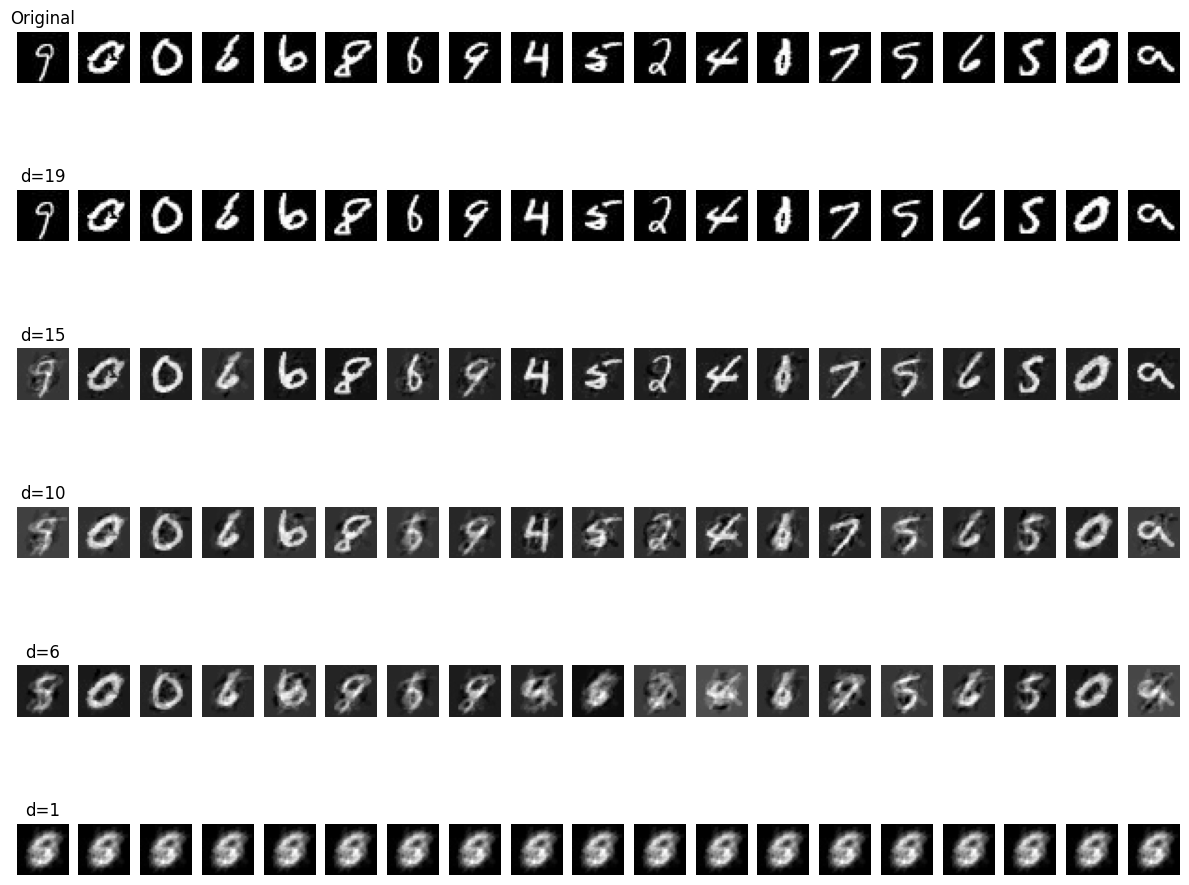

In [69]:
# 1 y 2
images = load_images_from_folder('datasets_imgs')
images_matrix = np.array(images)

components_list = [19, 15, 10, 6, 1]
reconstructed_images_list = []
Vt_list = []
U_list = []
Z_list = []

for n_components in components_list:
    images_reconstructed, Vt, U, S = pca_svd(images_matrix, n_components)
    reconstructed_images_list.append(images_reconstructed)
    Vt_list.append(Vt)
    U_list.append(U)

image_shape = (28, 28)

show_images_multiple_reconstructions(images_matrix, reconstructed_images_list, image_shape, components_list)

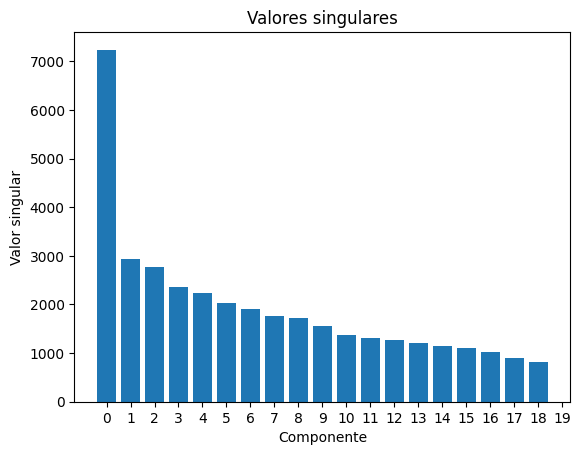

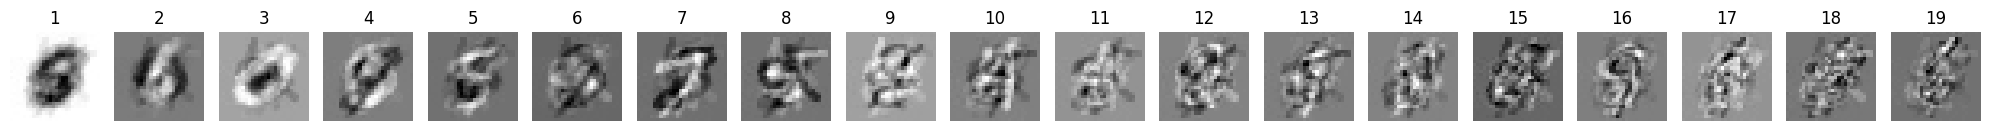

In [70]:
#componentes principales Vt
_, Vt, _, S = pca_svd(images_matrix, 19)
plt.figure()
plt.bar(range(19), S.diagonal())
plt.title('Valores singulares')
plt.xlabel('Componente')
plt.ylabel('Valor singular')
plt.xticks(np.arange(0, 20, 1))
plt.show()

show_principal_components(Vt, image_shape)

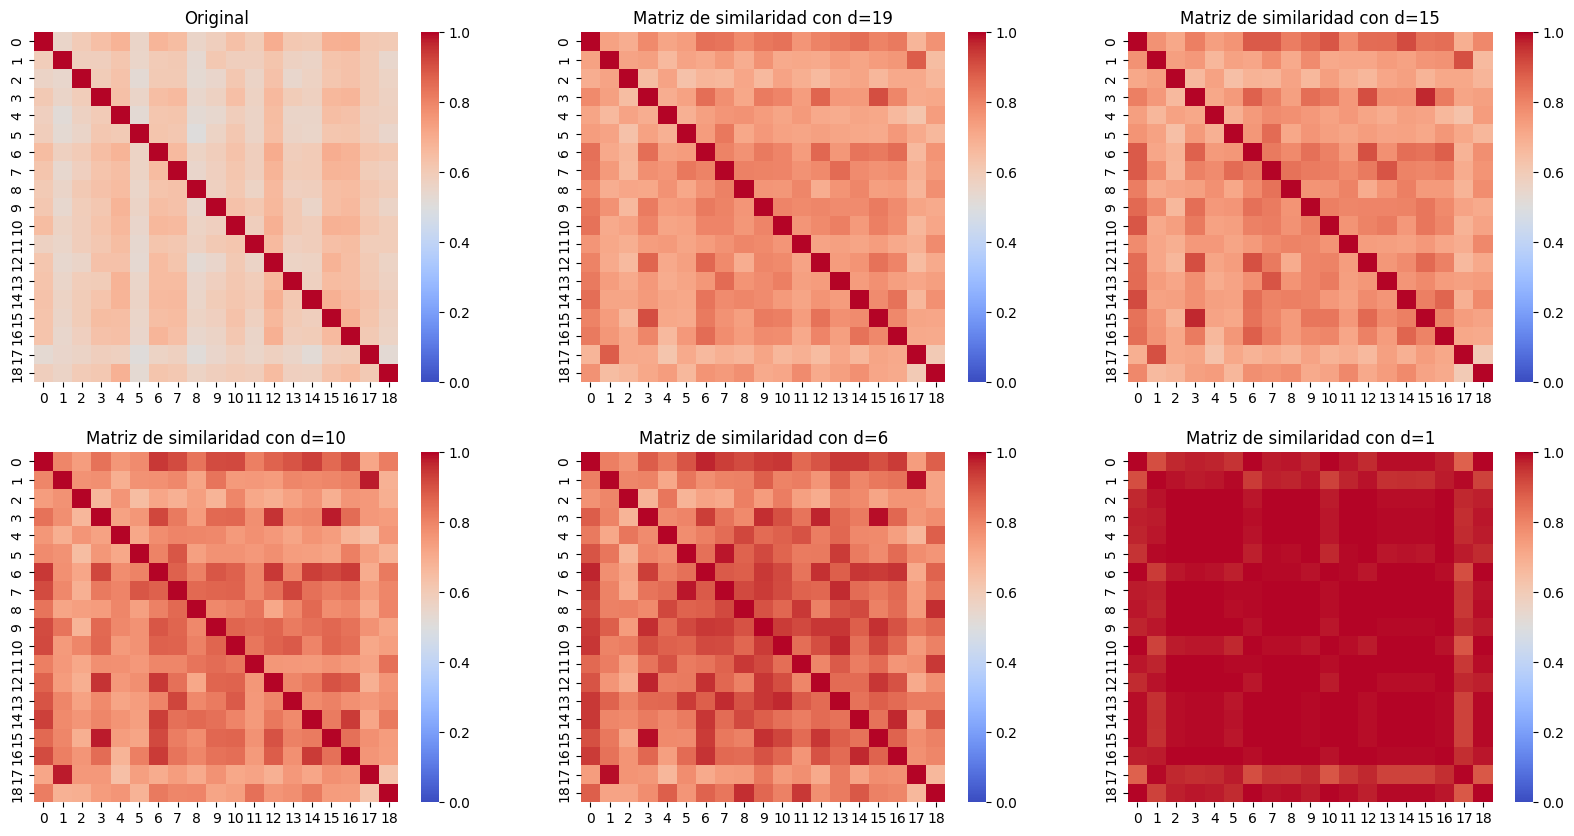

In [71]:
# Matrices de similaridad
sigma = calculate_sigma(images_matrix)
similarity_matrices = [similarity_matrix(images_matrix, sigma)]

for reconstructed_images in reconstructed_images_list:
    similarity_matrices.append(similarity_matrix(reconstructed_images, sigma))
titles = ['Original'] + [f'Matriz de similaridad con d={d}' for d in components_list]
plt.figure(figsize=(20, 10))

for i, sim_matrix in enumerate(similarity_matrices):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(sim_matrix, cmap='coolwarm', vmin=0, vmax=1)
    plt.title(titles[i])
plt.show()

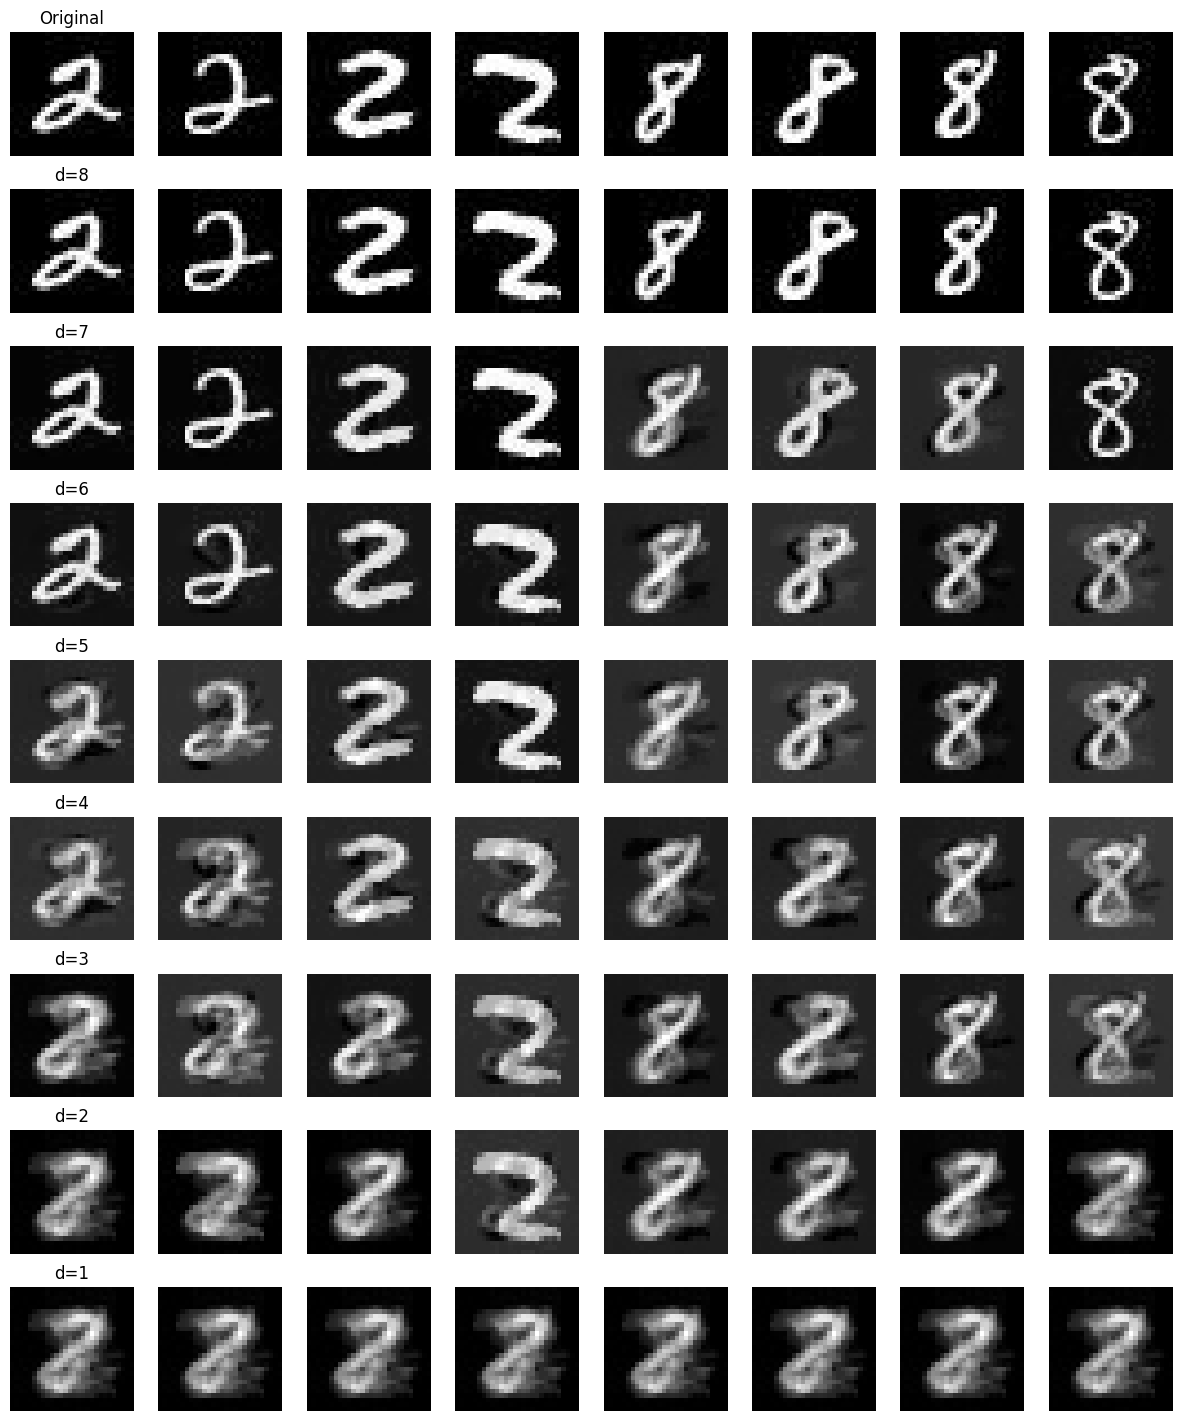

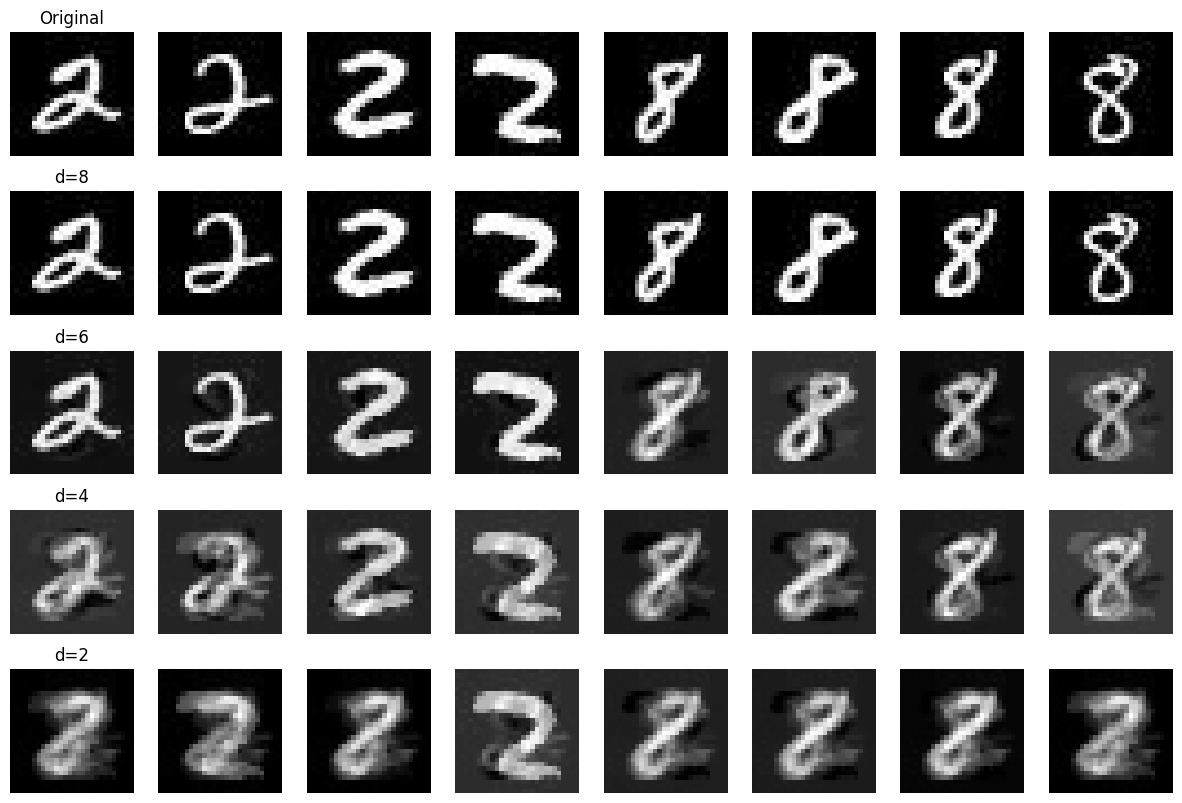

In [72]:
# 4 graficar imagenes 2
images = load_images_from_folder('datasets_imgs_02')
images_matrix_02 = np.array(images)

components_list_02 = [8,7,6,5,4,3,2,1]
reconstructed_images_list_02 = []
Vt_list_02 = []

for n_components in components_list_02:
    images_reconstructed, Vt, _, _ = pca_svd(images_matrix_02, n_components)
    reconstructed_images_list_02.append(images_reconstructed)
    Vt_list_02.append(Vt)

image_shape = (28, 28)

show_images_multiple_reconstructions(images_matrix_02, reconstructed_images_list_02, image_shape, components_list_02)

n_componentes_pares = [8,6,4,2]
reconstructed_images_list_02_conpares=[]
for n_components in n_componentes_pares:
    images_reconstructed_conpares, _, _, _ = pca_svd(images_matrix_02, n_components)
    reconstructed_images_list_02_conpares.append(images_reconstructed_conpares)
    
show_images_multiple_reconstructions(images_matrix_02, reconstructed_images_list_02_conpares, image_shape, n_componentes_pares)

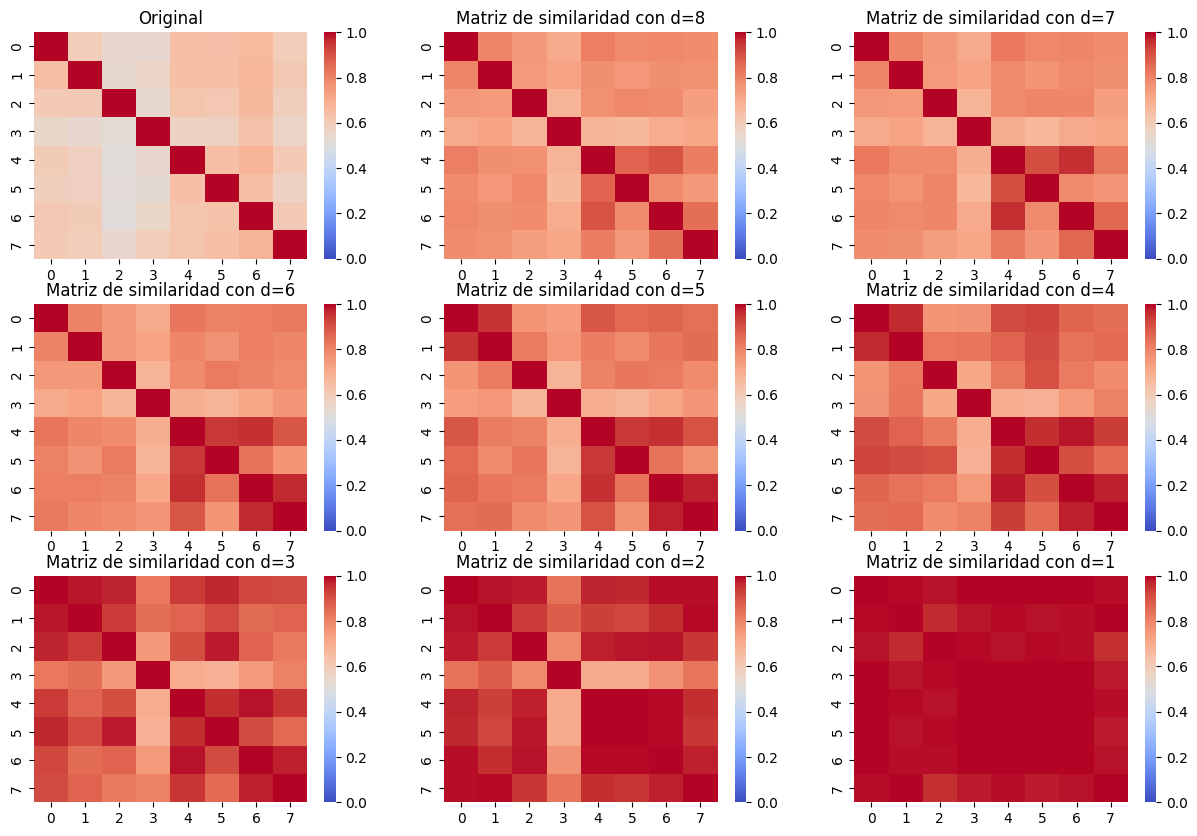

In [80]:
#Matrices de similaridad
sigma = calculate_sigma(images_matrix_02)
similarity_matrices_02 = [similarity_matrix(images_matrix_02, sigma)]

for reconstructed_images in reconstructed_images_list_02:
    similarity_matrices_02.append(similarity_matrix(reconstructed_images, sigma))
titles = ['Original'] + [f'Matriz de similaridad con d={d}' for d in components_list_02]
plt.figure(figsize=(15, 10))

for i, sim_matrix in enumerate(similarity_matrices_02):
    plt.subplot(3, 3, i + 1)
    sns.heatmap(sim_matrix, cmap='coolwarm', vmin=0, vmax=1)
    plt.title(titles[i])
plt.show()


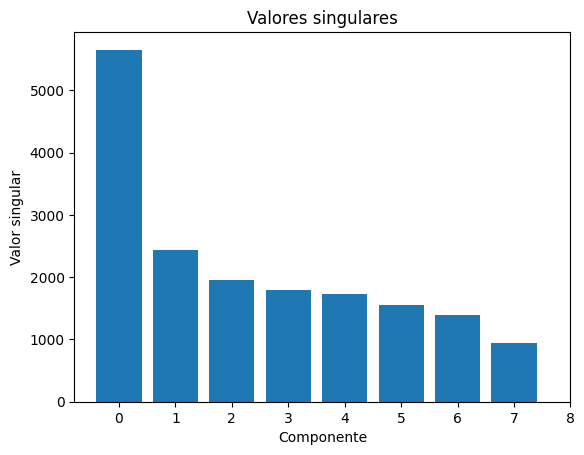

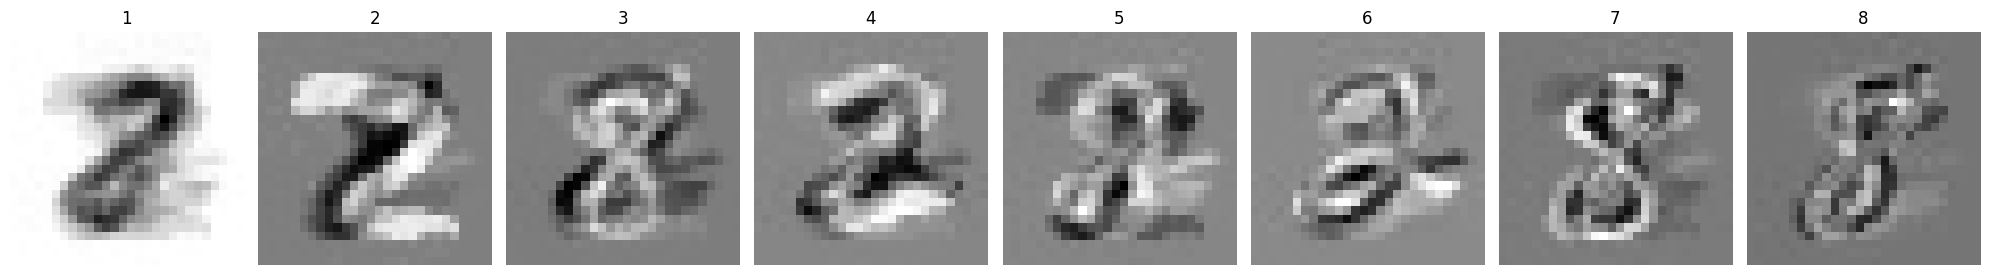

In [75]:
# 4 componentes principales
_, Vt, _, S = pca_svd(images_matrix_02, 8)

# grafico de los autovalores que están en la matriz s como barras para ver su magnitud, donde la altura está dada por el valor del autovalor
plt.figure()
plt.bar(range(8), S.diagonal())
plt.title('Valores singulares')
plt.xlabel('Componente')
plt.ylabel('Valor singular')
plt.xticks(np.arange(0, 9, 1))
plt.show()

show_principal_components(Vt, image_shape)

In [ ]:
#Errores relativos con frobenius
for i, matriz in enumerate(reconstructed_images_list_02):
    error_relativo = np.linalg.norm(images_matrix_02-matriz, ord="fro")/np.linalg.norm(images_matrix_02, ord="fro")
    if error_relativo < 0.1:
        print(f'Dimension: {components_list_02[i]}, error relativo: {error_relativo}')

Dimension: 8, error relativo: 4.258283722616818e-15


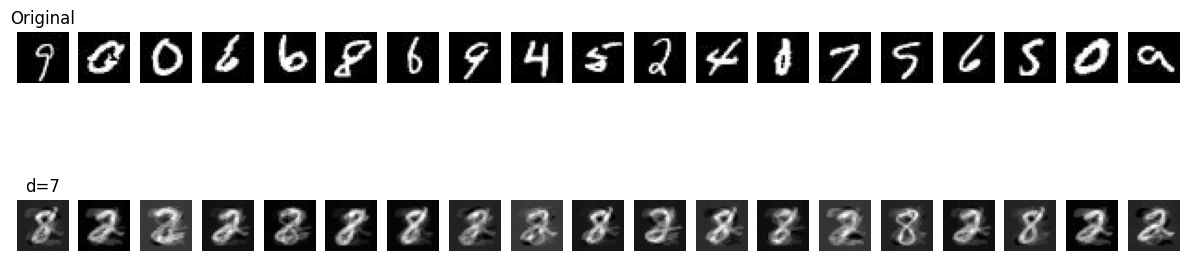

In [ ]:
#4 graficar imagenes 1 con vt del 2
matriz_dimension_7 = reconstructed_images_list_02[1]
matriz_reconstruida_01, _, U_01, S_01  = pca_svd(images_matrix, 7)
matriz_reconstruida_02, Vt_2, _, _ = pca_svd(images_matrix_02, 7)

matriz_01_con_dimension_7 = np.dot(images_matrix, np.dot(Vt_2.T, Vt_2))
show_images_multiple_reconstructions(images_matrix, [matriz_01_con_dimension_7], image_shape, [7])

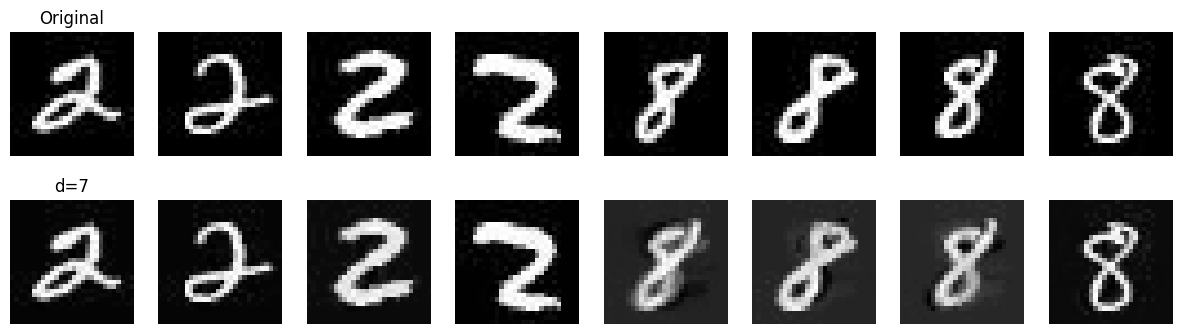

In [ ]:
# grafica imagenes 2 con dimension 7
images = load_images_from_folder('datasets_imgs_02')
images_matrix_02 = np.array(images)

components_list_02 = [7]
reconstructed_images_list_02a = []
Vt_list_02 = []

for n_components in components_list_02:
    images_reconstructed, Vt, _, _ = pca_svd(images_matrix_02, n_components)
    reconstructed_images_list_02a.append(images_reconstructed)
    Vt_list_02.append(Vt)

image_shape = (28, 28)

show_images_multiple_reconstructions(images_matrix_02, reconstructed_images_list_02a, image_shape, components_list_02)

Errores reconstruccion imagenes 1 (punto 1 y 2)
Dimension: 19, error relativo: 6.1395451850007946e-15
Dimension: 15, error relativo: 0.18685387752097676
Dimension: 10, error relativo: 0.3302511936225838
Dimension: 6, error relativo: 0.4718764712904485
Dimension: 1, error relativo: 0.715148817458468


Errores reconstruccion imagenes 2 (punto 4)
Dimension: 8, error relativo: 4.258283722616818e-15
Dimension: 7, error relativo: 0.1282718114183337
Dimension: 6, error relativo: 0.2302938716191221
Dimension: 5, error relativo: 0.3131829394129219
Dimension: 4, error relativo: 0.39239514511901175
Dimension: 3, error relativo: 0.46345778074600347
Dimension: 2, error relativo: 0.5351177118764909
Dimension: 1, error relativo: 0.6314190139908188


Errores reconstruccion imagenes 1 con la representacion aprendida de las imagenes 2 (punto 4)
Dimension: 7, error relativo: 0.747997794911699


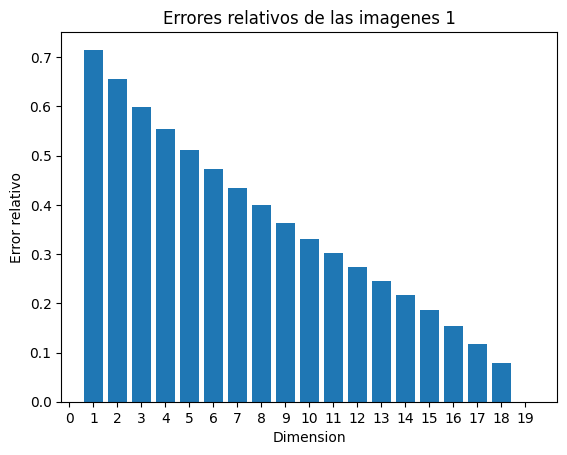

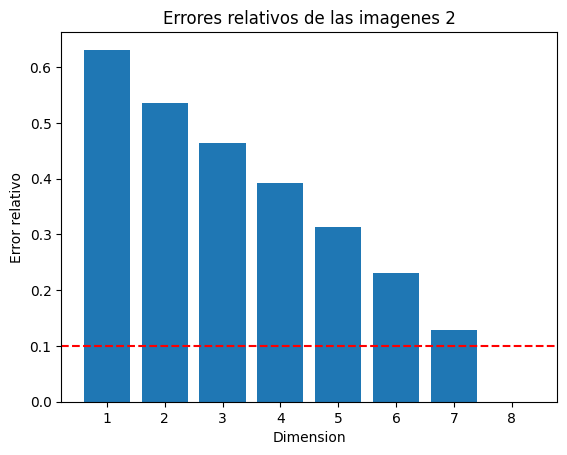

In [ ]:
##Errores de dimensiones 1
print ("Errores reconstruccion imagenes 1 (punto 1 y 2)")
for i, matriz in enumerate(reconstructed_images_list):
    print(f'Dimension: {components_list[i]}, error relativo: {np.linalg.norm(images_matrix-matriz, ord="fro")/np.linalg.norm(images_matrix, ord="fro")}')
print ('\n')

components_list_02=[8,7,6,5,4,3,2,1]
##Errores de dimensiones 2
print ("Errores reconstruccion imagenes 2 (punto 4)")
for i, matriz in enumerate(reconstructed_images_list_02):
    print(f'Dimension: {components_list_02[i]}, error relativo: {np.linalg.norm(images_matrix_02-matriz, ord="fro")/np.linalg.norm(images_matrix_02, ord="fro")}')
print ('\n')

##Errores de dimensiones 1 reconstruida con 2
print ("Errores reconstruccion imagenes 1 con la representacion aprendida de las imagenes 2 (punto 4)")
print(f'Dimension: 7, error relativo: {np.linalg.norm(images_matrix-matriz_01_con_dimension_7, ord="fro")/np.linalg.norm(images_matrix, ord="fro")}')

#graficar los errores relativos de las imagenes 1
#HACERLO CON TODAS LAS DIMENSIONES, NO SOLO LAS PARES
dimensiones = [19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
reconstruidas = []
for dim in dimensiones:
    images_reconstructed, _, _, _ = pca_svd(images_matrix, dim)
    reconstruidas.append(images_reconstructed)

plt.figure()
plt.bar(dimensiones, [np.linalg.norm(images_matrix-matriz, ord="fro")/np.linalg.norm(images_matrix, ord="fro") for matriz in reconstruidas])
plt.xticks(ticks=range(20), labels=range(20))
plt.title('Errores relativos de las imagenes 1')
plt.xlabel('Dimension')
plt.ylabel('Error relativo')
plt.show()

#graficar los errores relativos de las imagenes 2
plt.figure()
plt.bar(components_list_02, [np.linalg.norm(images_matrix_02-matriz, ord="fro")/np.linalg.norm(images_matrix_02, ord="fro") for matriz in reconstructed_images_list_02])
plt.axhline(y=0.1, color='r', linestyle='--')
plt.title('Errores relativos de las imagenes 2')
plt.xlabel('Dimension')
plt.ylabel('Error relativo')
plt.show()